In [1]:
from IPython.display import Image

In [2]:
cd /Users/vallevaro/Desktop/GaiaLab/notebooks/figures

/Users/vallevaro/Desktop/GaiaLab/notebooks/figures


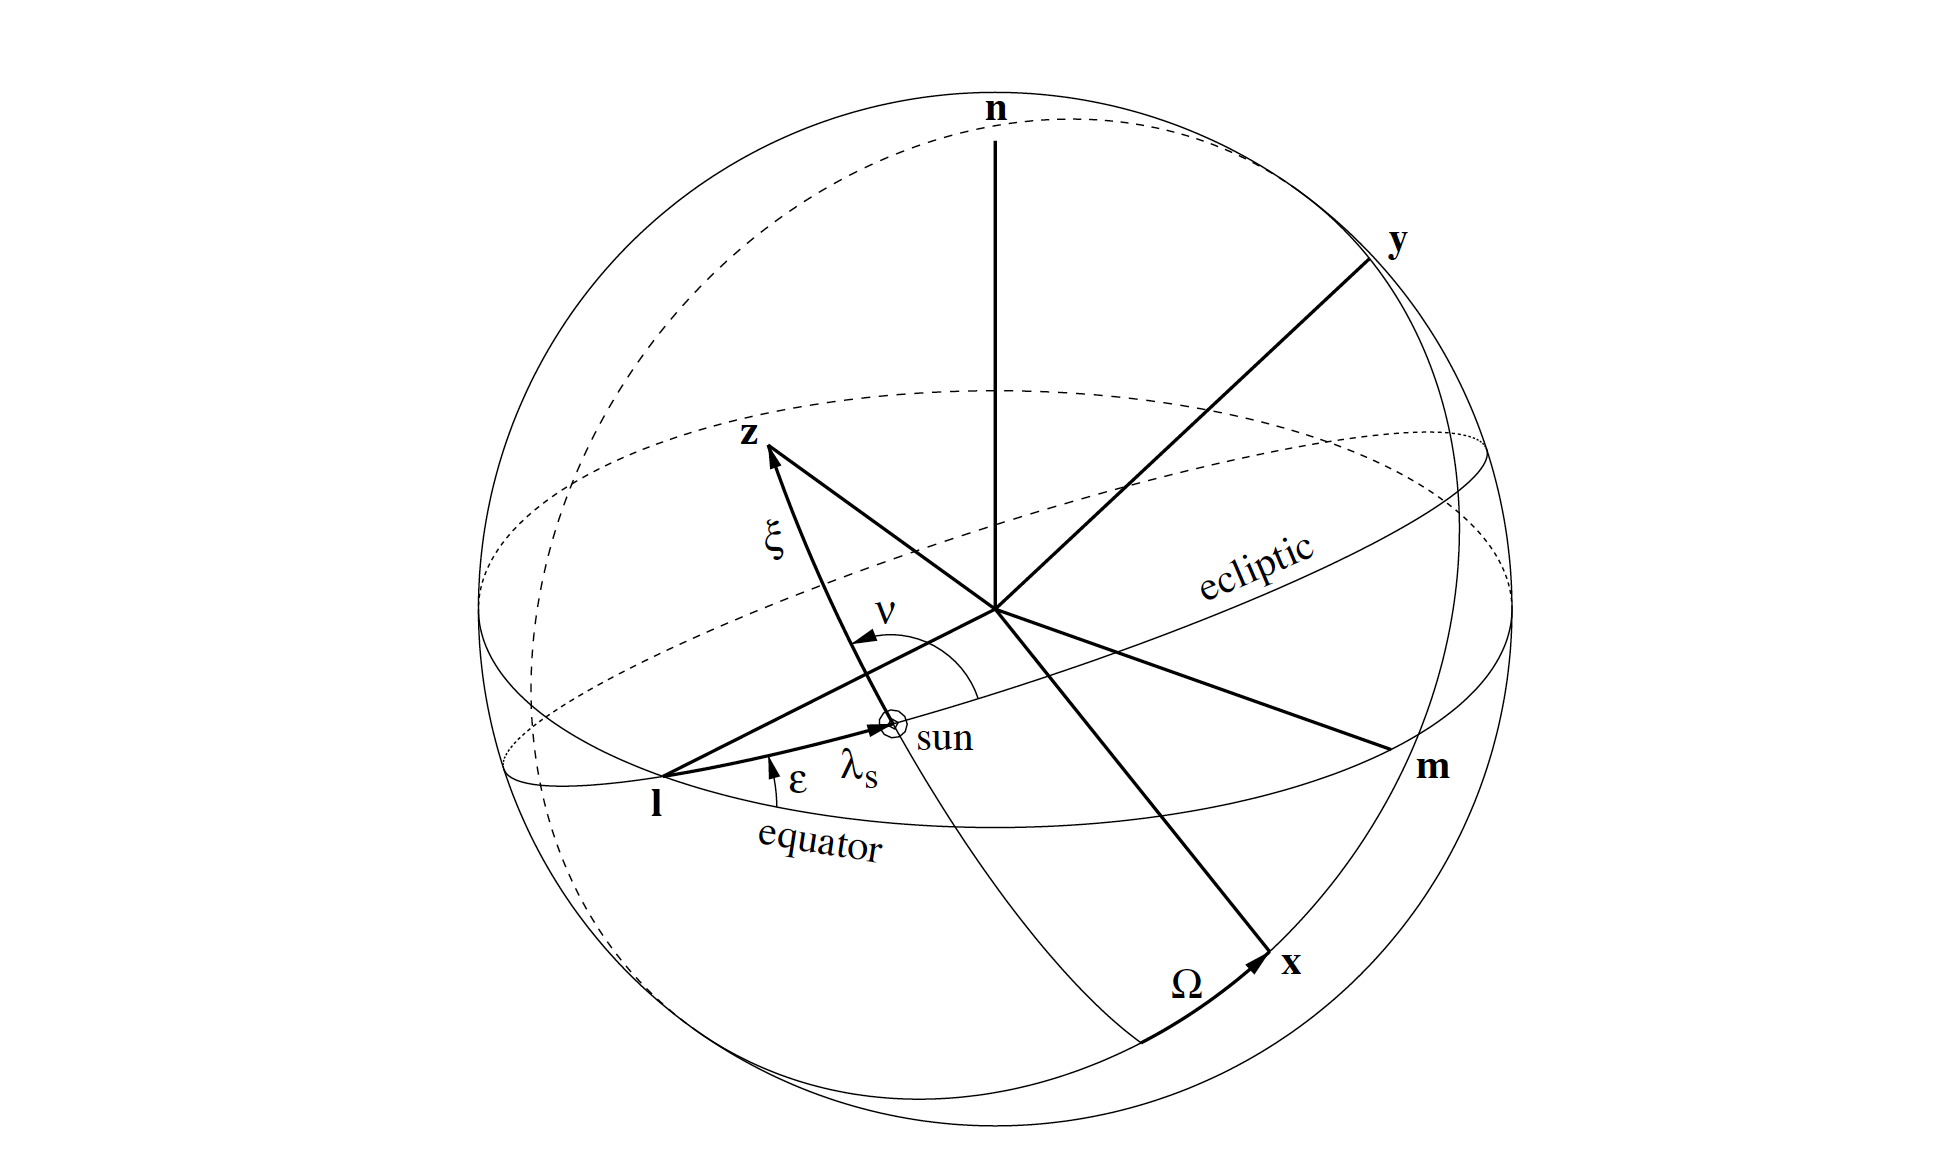

In [3]:
Image('nls_angles.png')

Frames of referenced used:
* Celestial Frame: $\textbf{G} = \big[ \textbf{l},\textbf{m},\textbf{n}\big]$
* Instrument Frame: $\textbf{Z} = \big[ \textbf{x},\textbf{y},\textbf{z}\big]$
* Barycentric Reference System $\textbf{BCRS}= \big[ \textbf{l'},\textbf{m'},\textbf{n'}\big]$ 

The BCRS is a frame of reference that has its axis all parallel to G-Frame, but that is displaced by 1AU. That is to say, it is the frame centered at the sun.


In [4]:
cd /Users/vallevaro/Desktop/GaiaLab/packages/scan/analytic_scanner

/Users/vallevaro/Desktop/GaiaLab/packages/scan/analytic_scanner


In [5]:
from gaia_analytic_toymodel import*

In [6]:
from analytic_plots import*

Create the gaia object. By default, the time for the satellite operating is of 5 years and the creation of data to feed the splines for every hour.

In [7]:
gaia = Attitude(ti=0, tf=365*5, dt= 1/24.)

Now we plot the time evolution of the attitude components, begining at $t=0$ up to $t=80$ days. 


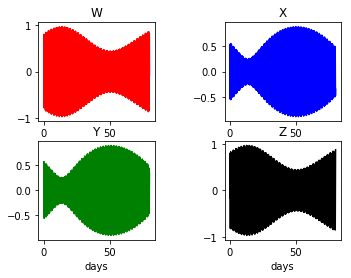

In [8]:
plot_attitude(gaia, 0, 80)

Create three example stars from real data. The Source object takes as inputs:

Source('name', $\alpha$, $\delta$, parallax, $\mu_{\alpha}$, $\mu_{\delta}$, $\mu_{r}$)

with units: [string, deg, deg, mas, mas/yr, mas/yr, km/s]



Once the satellite and its correspondent attitude object is created, we need to create a scanner. At the moment, the scaner is only able to perform the search of one single star in the sky. 

The scanner takes in two parameters. The first does a scan of the sky taking the dot product of the x-axis of the scanner (with respect to the LMN-frame) and the star's position (also in LMN). Since the scanning law has an almost perfect coverage of the sky (would be interesting to do a density plot of where it scans more in the future), it selects the times when the star is in this circle field of view. For this example we set it to 20 deg. The second input parameters sets the z-axis value threshold for the scanner ccd dimentions. That is to say, the height of the scanning line that swaps the sky. 

# Sirio

Firstly, the coarse scan is performed, using the desire satellite and the star that we want to scan.
Secondly, we search for the optimized solutions with the fine scan, which uses the data from the coarse scan.

In [9]:
sirio = Source("sirio", 101.28, -16.7161, 379.21, -546.05, -1223.14, -7.6)

Plot of the star trayectory from G-frame (i.e. at a point moment around the sun in ecliptic plane in circular orbit of 1 AU).

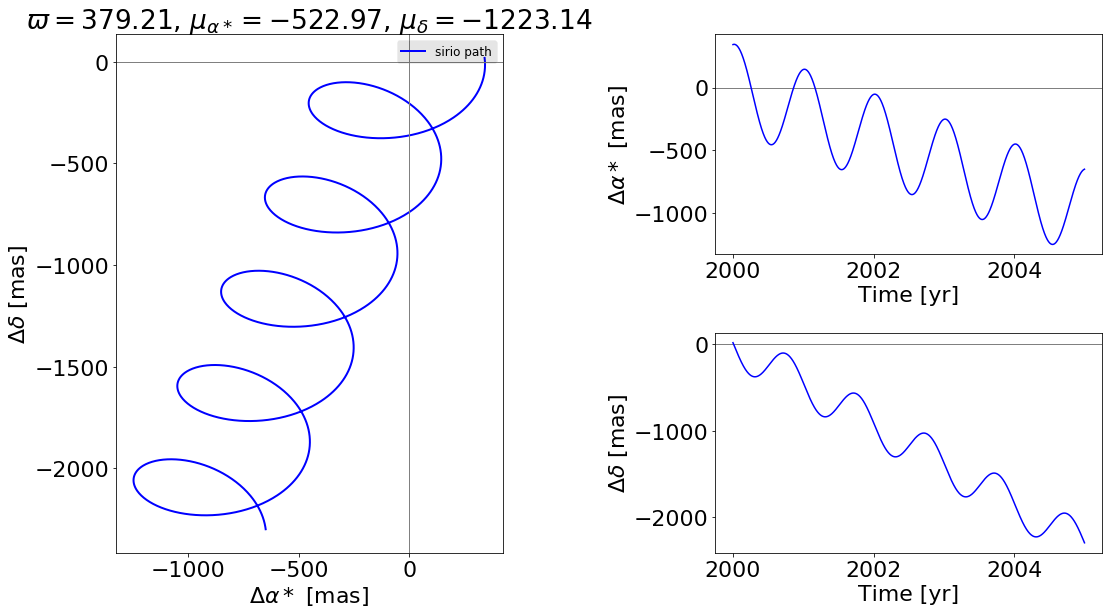

In [10]:
plot_stars_trajectory(sirio, gaia)

In [11]:
scanSirio = Scanner(np.radians(30), np.radians(1))

In [12]:
scanSirio.start(gaia, sirio)

In [13]:
len(scanSirio.obs_times)

15

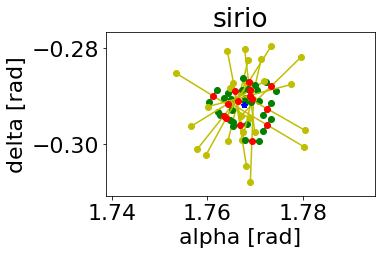

In [14]:
plot_observations(sirio, gaia, scanSirio)

The red dots represent the calculated position of the observations. The yellow bars are the erros in the z-axis of the scanner for each position-observation, and the green ones the error bars for the y-axis of the scanner.

# Vega

In [15]:
vega = Source("vega", 279.2333, 38.78, 128.91, 201.03, 286.23, -13.9)

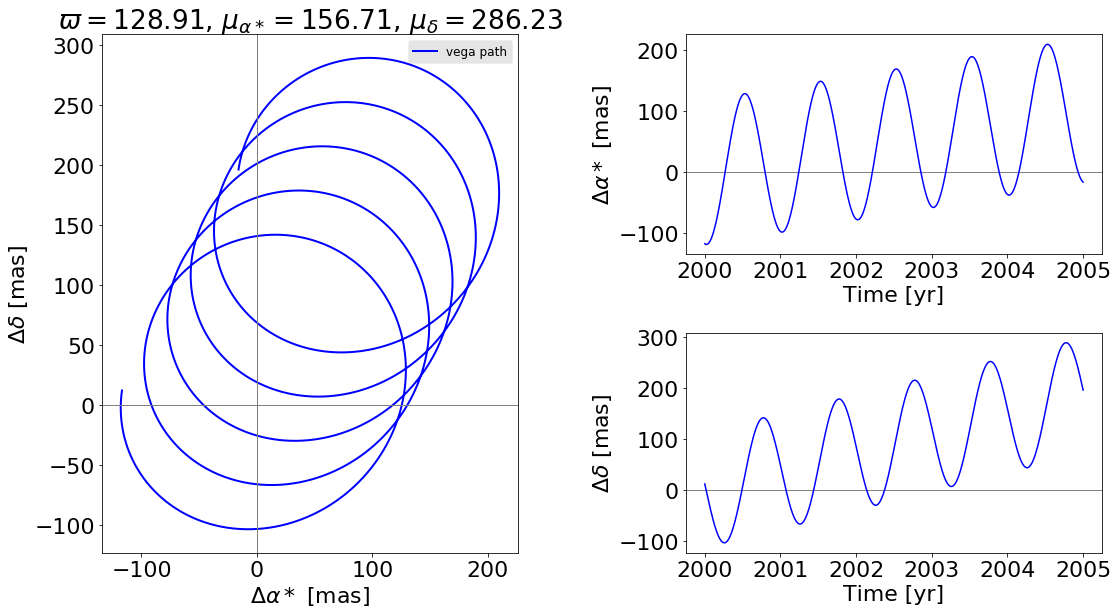

In [16]:
plot_stars_trajectory(vega, gaia)

In [17]:
scanVega = Scanner(np.radians(30), np.radians(1))

In [18]:
scanVega.start(gaia, vega)

In [19]:
len(scanVega.times_fine_scan)

13

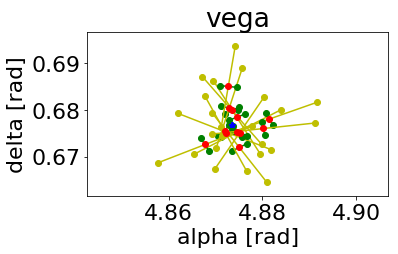

In [20]:
plot_observations(vega, gaia, scanVega)

# Proxima Centauri

In [21]:
proxima = Source("proxima",217.42, -62, 768.7, 3775.40, 769.33, 21.7)

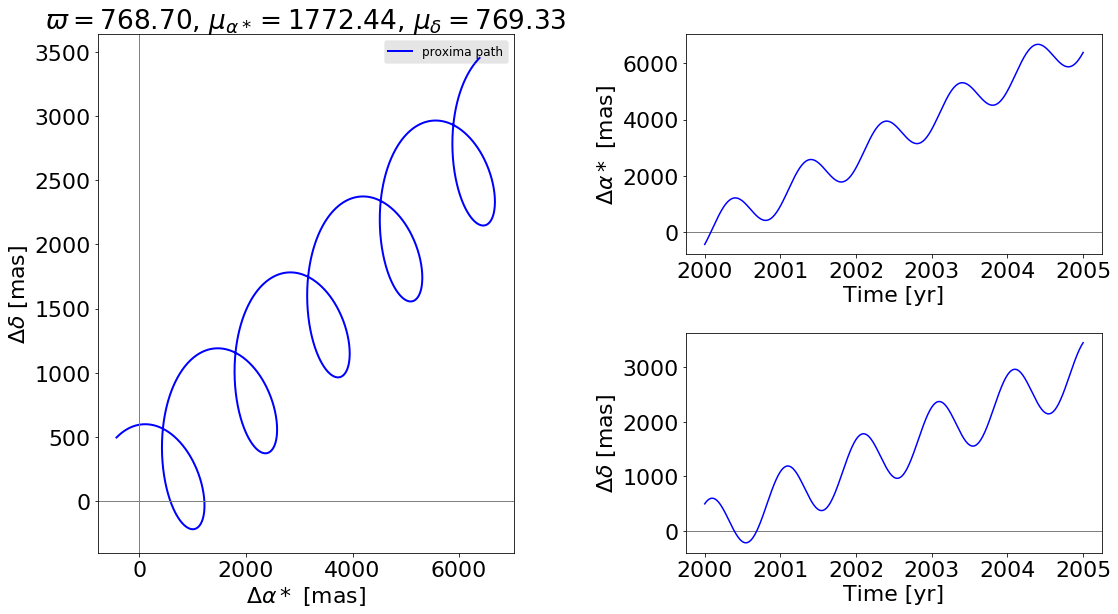

In [22]:
plot_stars_trajectory(proxima, gaia)

In [23]:
scanProxima = Scanner(np.radians(30), np.radians(1))

In [24]:
scanProxima.start(gaia, proxima)

In [25]:
len(scanProxima.times_fine_scan)

10

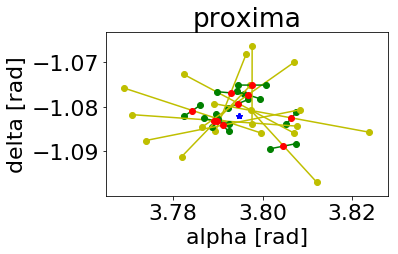

In [26]:
plot_observations(proxima, gaia, scanProxima)